# Model: Decision Tree Model Following Reference With and Without Rebalancing

Decision Trees on the Titanic Data Set http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

* features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
* Accuracy Score = 0.83240223463687146

The above Kaggle Kernel shows how Decision Trees may be applied to the Titanic data. The author shows an accuracy of 0.8324.  The author does not specify the random_state so it is impossible to reproduce his work exactly. 

What is interesting is that the accuracy calculated and cross validation scores are significantly different. I don't understand why this is the case. 


# Initialization

In [1]:
%run init.ipynb

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.tree import (DecisionTreeClassifier, 
                          export_graphviz)

from sklearn.preprocessing import scale

import great_expectations as ge

RANDOM_STATE = 42

from progressbar import ProgressBar
import seaborn as sns

from data.data import (transform_X_numerical, 
                           transform_X_categorical, 
                           transform_X)

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_val_score, cross_validate



For more information on progressbar. Look here https://pypi.org/project/progressbar2/

## Extract Clean Data

**Separate data into X (features) and y (label) from the raw data**

This is exactly what Ben did in his notebook.

In [9]:
Xy = pd.read_csv('../data/raw/train.csv')
Xy.columns = Xy.columns.str.lower()

features = ['passengerid', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']

Xy = Xy[features].dropna().set_index('passengerid')
Xy.sex = Xy.sex.map({'male':0, 'female':1})         # Convert sex to an integer via mapping. 

X = Xy.drop('survived', axis=1)
y = Xy['survived']


**List of Features**

## Train Test Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_STATE)

X_train.columns
X_train

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

,pclass,sex,age,sibsp,parch,fare
passengerid,,,,,,
831,3,1,15.0,1,0,14.4542
566,3,0,24.0,2,0,24.1500
149,2,0,36.5,0,2,26.0000
106,3,0,28.0,0,0,7.8958
290,3,1,22.0,0,0,7.7500
...,...,...,...,...,...,...
180,3,0,36.0,0,0,0.0000
809,2,0,39.0,0,0,13.0000
94,3,0,26.0,1,2,20.5750


In [23]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_split=1e-07, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort=False, random_state=RANDOM_STATE, splitter='best');

In [24]:
model.fit(X_train, y_train)

preds = model.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [25]:
ii_y_pred, ii_predicted_accuracy_score, ii_cv_scores = pm.calc_model_rst_table_metrics(model, X_train, y_train, X_test, y_test, 
                                                      model_name='xgb', cv=5, verbose=True)
    


Accuracy Score on X_test,y_test:  0.8252


Cross Validation Scores:
	Accuracy 	: 0.7424 (+/- 0.0645)
	Recall		: 0.7164 (+/- 0.2125)
	Precision	: 0.6742 (+/- 0.0710)
	F1		: 0.6907 (+/- 0.1122)


11/22/19, xgb,  <kaggle_accuracy>, 0.7424, 0.7164,0.6742,0.6907


### Split data into train and test with Near Miss Balancing. 

https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/under-sampling/plot_illustration_nearmiss.html#nearmiss-1

In [6]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3, random_state = RANDOM_STATE)
X_resampled_nm1, y_resampled_nm1 = nm.fit_resample(X.reset_index(), y)

df_X_resampled = pd.DataFrame(X_resampled_nm1, columns=X.reset_index().columns).set_index('passengerid')
df_y_resampled = pd.DataFrame(y_resampled_nm1, index=df_X_resampled.index, columns=['survived'])

df_X_resampled = df_X_resampled.sort_index()
df_y_resampled = df_y_resampled.sort_index()

In [7]:
df_X_resampled
df_y_resampled

,pclass,sex,age,sibsp,parch,fare
passengerid,,,,,,
1.0,3.0,0.0,22.0,1.0,0.0,7.2500
2.0,1.0,1.0,38.0,1.0,0.0,71.2833
3.0,3.0,1.0,26.0,0.0,0.0,7.9250
4.0,1.0,1.0,35.0,1.0,0.0,53.1000
5.0,3.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
884.0,2.0,0.0,28.0,0.0,0.0,10.5000
886.0,3.0,1.0,39.0,0.0,5.0,29.1250
887.0,2.0,0.0,27.0,0.0,0.0,13.0000


,survived
passengerid,
1.0,0
2.0,1
3.0,1
4.0,1
5.0,0
...,...
884.0,0
886.0,0
887.0,0


In [20]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_split=1e-07, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort=False, random_state=RANDOM_STATE, splitter='best');

### Definitions

In [66]:
def check_accuracy_by_random_sampling(X,y):
    
    accuracy = []
    n_random=1000
    RANDOM_STATE_RANGE = list(range(0,n_random,1))
    len(RANDOM_STATE_RANGE)
    verbose = False

    pbar = ProgressBar(maxval=n_random).start()

    for i, random_state in enumerate(RANDOM_STATE_RANGE, start=0):
        
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state=random_state)

        model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_split=1e-07, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort=False, random_state=random_state, splitter='best');

        _ = model.fit(X_train, y_train);

        ii_y_pred, ii_predicted_accuracy_score, ii_cv_scores = pm.calc_model_rst_table_metrics(model, X_train, y_train, X_test, y_test, 
                                                      model_name='dtree_reference', cv=5, verbose=verbose)
    
   
        accuracy.append( [random_state,
                              ii_predicted_accuracy_score, 
                              np.mean(ii_cv_scores['test_accuracy']),
                              np.std(ii_cv_scores['test_accuracy'])])

        pbar.update(i)

    pbar.finish()
    
    return np.array(accuracy)


### Decision Tree Classifier without rebalancing

In [67]:
accuracy = check_accuracy_by_random_sampling(X,y)

100% |########################################################################|


In [69]:
df_accuracy =  pd.DataFrame(accuracy[:,1:3], columns=['Test', 'Cross Val'])
df_accuracy.describe()

,Test,Cross Val
count,1000.000000,1000.000000
mean,0.761734,0.756144
std,0.033850,0.017072
min,0.657343,0.700412
25%,0.741259,0.744321
50%,0.762238,0.756460
75%,0.783217,0.767148
max,0.853147,0.803905


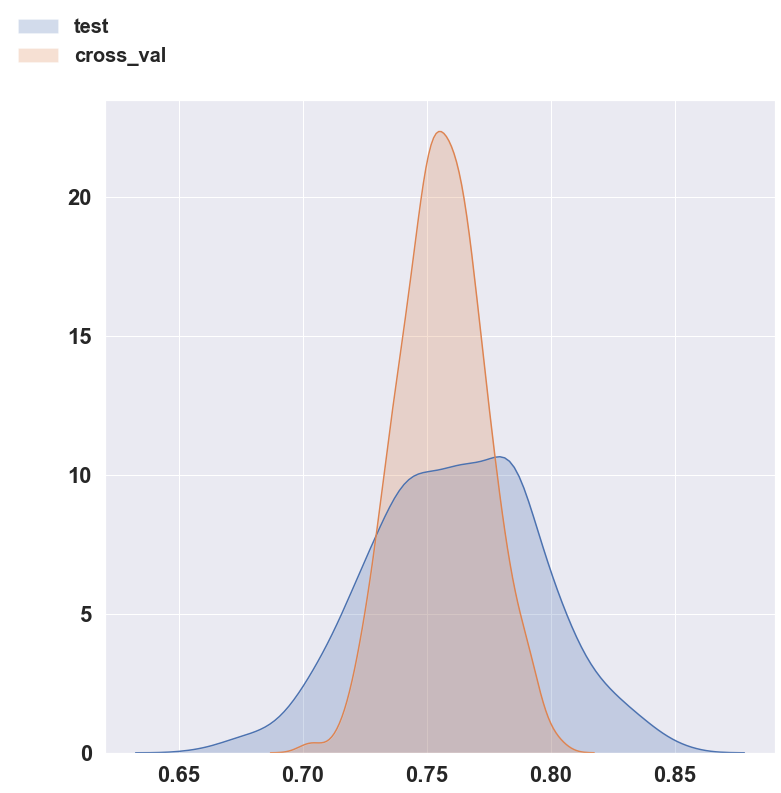

In [70]:
fig, ax = plt.subplots(figsize=(12, 12));

labels = ['test', 'cross_val']
sns.set(font_scale = 2)  # This changes the font size off all fonts by the same scale. 

for ii, a in enumerate(np.transpose(accuracy[:,1:3])):
    _ = sns.distplot(a,  ax=ax,  kde=True, hist=False, kde_kws={"shade": True});
   
fig.legend(labels=labels, fontsize=20, loc='upper left');


### Decision Tree Classifier with rebalancing

In [73]:
accuracy_rebalanced = check_accuracy_by_random_sampling(df_X_resampled,df_y_resampled)

100% |########################################################################|


In [74]:
df_accuracy_rebalanced =  pd.DataFrame(accuracy_rebalanced[:,1:3], columns=['Test', 'Cross Val'])
df_accuracy_rebalanced.describe()

,Test,Cross Val
count,1000.000000,1000.000000
mean,0.733707,0.725984
std,0.038503,0.020124
min,0.620690,0.661656
25%,0.706897,0.712732
50%,0.732759,0.726274
75%,0.758621,0.739270
max,0.844828,0.784502


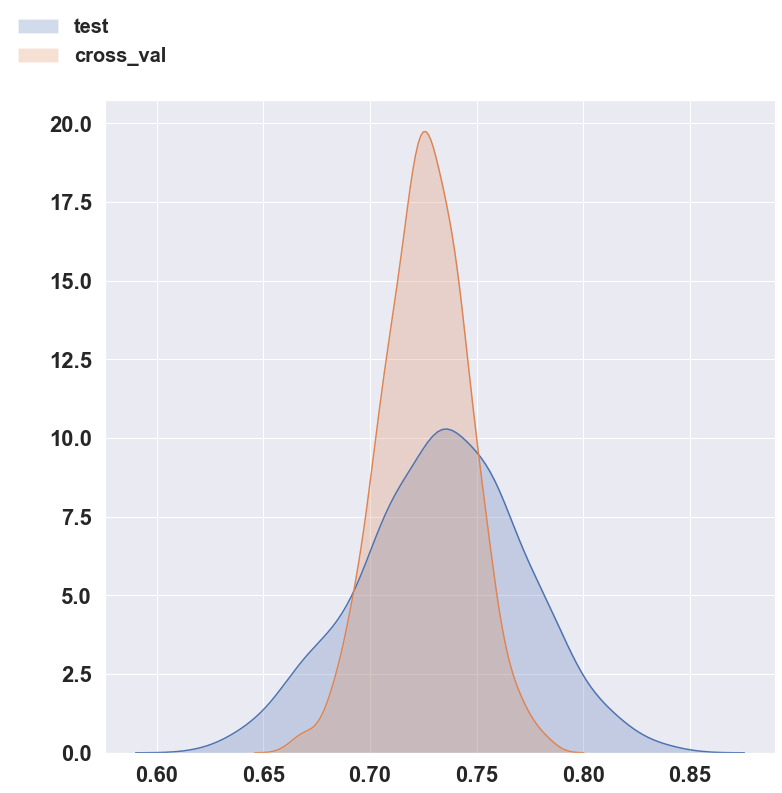

In [76]:
fig, ax = plt.subplots(figsize=(12, 12));

labels = ['test', 'cross_val']
sns.set(font_scale = 2)  # This changes the font size off all fonts by the same scale. 

for ii, a in enumerate(np.transpose(accuracy_rebalanced[:,1:3])):
    _ = sns.distplot(a,  ax=ax,  kde=True, hist=False, kde_kws={"shade": True});
   
fig.legend(labels=labels, fontsize=20, loc='upper left');


# Visualize the Decision Tree

In [69]:
feature_names=X.columns

tree_name = 'tree_ben_keen'
export_graphviz(model, out_file=f'{tree_name}.dot', feature_names=feature_names)

from subprocess import call
call(['dot', '-T', 'png', f'{tree_name}.dot', '-o', f'{tree_name}.png'])

0

# Prepare Submission

In [30]:
transform_X?

Signature:
transform_X(
    Xy,
    numerical_columns=['age', 'fare', 'family_size'],
    categorical_columns=['sex', 'embarked', 'title', 'age_bin', 'fare_bin', 'is_child', 'is_traveling_alone', 'pclass'],
)
Docstring: <no docstring>
File:      ~/projects/kaggle_titanic/src/data/data.py
Type:      function


In [31]:
from models import kaggle

filename = 'dtree.csv'

X_holdout = pd.read_csv('../data/processed/holdout__2019-11-21.csv', 
                        index_col='passengerid', 
                        dtype={'pclass':str, 'is_child':int, 'is_traveling_alone':int})

X_holdout

X_test_kaggle_public = transform_X(X_holdout)#.reindex(X_test.columns, axis=1)
X_test_kaggle_public

X_test_kaggle_public.describe()

,pclass,name,sex,sibsp,parch,ticket,embarked,title,last_name,cabin_number,family_size,fare,fare_bin,age,age_bin,is_child,is_traveling_alone
passengerid,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,Q,Mr,Kelly,330911,1,7.8292,q1,34.5,young_adult,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S,Mrs,Wilkes,363272,2,7.0000,q1,47.0,adult,0,0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q,Mr,Myles,240276,1,9.6875,q2,62.0,senior,0,1
895,3,"Wirz, Mr. Albert",male,0,0,315154,S,Mr,Wirz,315154,1,8.6625,q2,27.0,young_adult,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S,Mrs,Hirvonen,3101298,3,12.2875,q2,22.0,student,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,S,Mr,Spector,3236,1,8.0500,q2,33.0,young_adult,0,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,C,Mrs,Oliva y Ocana,17758,1,108.9000,q4,39.0,adult,0,1
1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,S,Mr,Saether,3101262,1,7.2500,q1,38.5,adult,0,1


,age,fare,family_size,is_child,is_traveling_alone,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,...,age_bin_child,age_bin_senior,age_bin_student,age_bin_teen,age_bin_young_adult,fare_bin_q2,fare_bin_q3,fare_bin_q4,pclass_2,pclass_3
passengerid,,,,,,,,,,,,,,,,,,,,,
892,0.324727,-0.502621,-0.553443,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
893,1.284291,-0.517490,0.105643,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,2.435767,-0.469297,-0.553443,0,1,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
895,-0.251011,-0.487678,-0.553443,0,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
896,-0.634836,-0.422673,0.764728,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.209580,-0.498661,-0.553443,0,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
1306,0.670170,1.309826,-0.553443,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1307,0.631788,-0.513007,-0.553443,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


,age,fare,family_size,is_child,is_traveling_alone,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,...,age_bin_child,age_bin_senior,age_bin_student,age_bin_teen,age_bin_young_adult,fare_bin_q2,fare_bin_q3,fare_bin_q4,pclass_2,pclass_3
count,4.180000e+02,4.180000e+02,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,5.949521e-17,4.143416e-17,-2.974760e-17,0.069378,0.605263,0.636364,0.110048,0.645933,0.186603,0.586124,...,0.031100,0.026316,0.244019,0.069378,0.339713,0.232057,0.224880,0.263158,0.222488,0.521531
std,1.001198e+00,1.001198e+00,1.001198e+00,0.254400,0.489380,0.481622,0.313324,0.478803,0.390059,0.493117,...,0.173797,0.160265,0.430019,0.254400,0.474179,0.422651,0.418004,0.440875,0.416416,0.500135
min,-2.310618e+00,-5.861573e-01,-5.534426e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.348362e-01,-5.014265e-01,-5.534426e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.071555e-02,-3.837816e-01,-5.534426e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.379558e-01,-7.814546e-02,1.056429e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3.510478e+00,8.544298e+00,6.037412e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X_test_kaggle_public.index, name='Survived').to_frame().sort_index()
         )

y_pred.index.names = ['PassengerId']

y_pred.to_csv(filename)

message = (f'{filename} \n\n'
           f'This is a submission test via the Kaggle API. \n\n'
           f'{model} \n\n'
           f'{X_test_kaggle_public.columns} \n\n'
          )

print(message)

,pclass,sex,age,sibsp,parch,fare
count,0.0,0.0,4.180000e+02,0.0,0.0,4.180000e+02
mean,NaN,NaN,5.949521e-17,NaN,NaN,4.143416e-17
std,NaN,NaN,1.001198e+00,NaN,NaN,1.001198e+00
min,NaN,NaN,-2.310618e+00,NaN,NaN,-5.861573e-01
25%,NaN,NaN,-6.348362e-01,NaN,NaN,-5.014265e-01
50%,NaN,NaN,-2.071555e-02,NaN,NaN,-3.837816e-01
75%,NaN,NaN,4.379558e-01,NaN,NaN,-7.814546e-02
max,NaN,NaN,3.510478e+00,NaN,NaN,8.544298e+00


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [198]:
X = pd.read_csv('../data/processed/holdout.csv', index_col='passengerid')

In [199]:
X_test_kaggle_public = transform_X(X).reindex(X_test.columns, axis=1).fillna(0)
X_test_kaggle_public

,title_Mr,family_size,pclass
passengerid,,,
892,1,-0.553443,3
893,0,0.105643,3
894,1,-0.553443,2
895,1,-0.553443,3
896,0,0.764728,3
...,...,...,...
1305,1,-0.553443,3
1306,0,-0.553443,1
1307,1,-0.553443,3


In [202]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X.index, name='Survived').to_frame().sort_index()
         )

y_pred.index.names = ['PassengerId']

y_submission = (pd.read_csv('../data/raw/gender_submission.csv')
                .set_index('PassengerId')
               )
y_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [203]:
(y_pred.index == y_submission.index).all()
y_pred.index.names == y_submission.index.names
(y_pred.columns == y_submission.columns).all()

True

True

True

In [204]:
filename = 'dtree_model_2.csv'
y_pred.to_csv(filename)

y_pred_file = (pd.read_csv(filename)
                .set_index('PassengerId')
               )

(y_pred_file.index == y_submission.index).all()
y_pred_file.index.names == y_submission.index.names
(y_pred_file.columns == y_submission.columns).all()

True

True

True